In [41]:
import pandas as pd
import pandasql as ps

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [52]:
ISO_codes = ['CHN', 'DEU', 'IND', 'USA']

df = pd.read_excel('./Data/project_financing_world.xlsx')
df = df[df['ISO-code'].isin(ISO_codes)].reset_index(drop=True)
df = df.rename(columns={
        'Recipient Country/Area': 'Country',
        'Amount (USD million)': 'Amount'
    })

df = df[['Country', 'Year', 'Asset Class', 'Amount']]

df.head()

,Country,Year,Asset Class,Amount
0,China,2003,Grant,2.136677
1,China,2004,Grant,2.677459
2,China,2004,Grant,0.122239
3,China,2005,Grant,1.375227
4,China,2005,Grant,0.039990


In [53]:
query = """
    SELECT Year, Country, SUM(Amount) OVER (PARTITION BY Year, Country, 'Asset Class') AS Amount
    FROM df
    WHERE Year >= 2000
    GROUP BY Year, Country, 'Asset Class'
    ORDER BY Country
"""

agg = ps.sqldf(query)

<AxesSubplot:xlabel='Year', ylabel='Amount'>

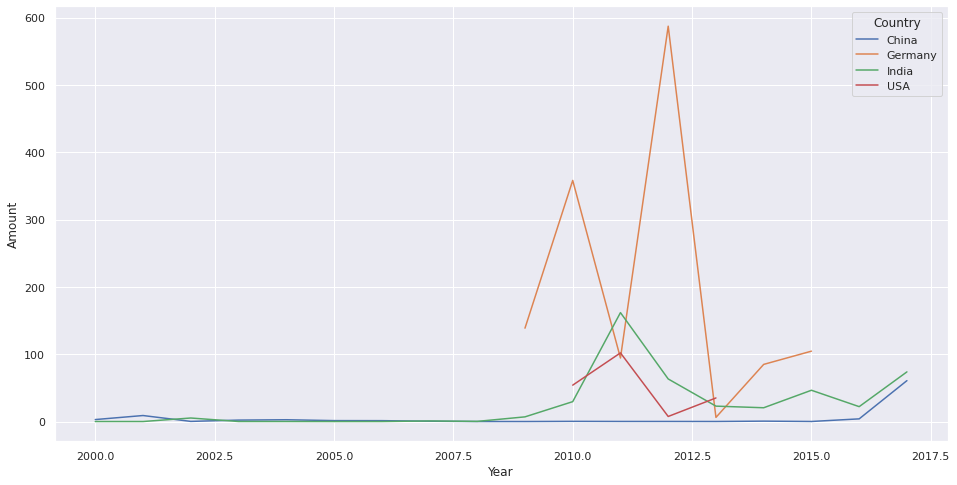

In [54]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=agg, x='Year', y='Amount', hue='Country')

<AxesSubplot:xlabel='Year'>

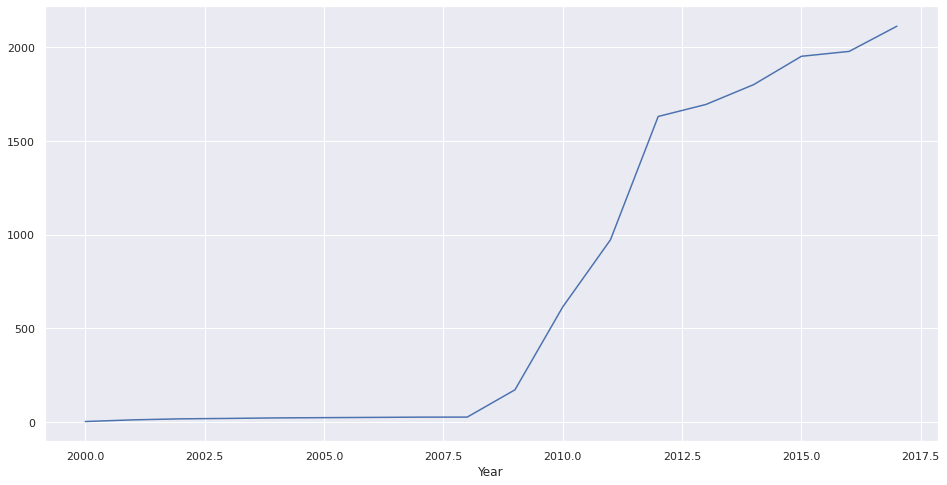

In [75]:
agg2 = agg.groupby('Year').sum()['Amount'].cumsum()

plt.figure(figsize=(16, 8))
agg2.plot()